### Imports

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as ssb
import matplotlib.pyplot as plt
import cufflinks as cf
from IPython.display import display,HTML

# Int cufflinks
#making all charts public and setting a global theme
cf.set_config_file(theme='solar',offline=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Set matplotlib in Darkmode
plt.style.use('dark_background')

### 01. Exploring the Dataset

In [2]:
# Loading data using pandas
path = './diabetes.csv'

In [3]:
def load_dataset(path:str) -> pd:
    return pd.read_csv(path)

In [4]:
dataset = load_dataset(path)

In [5]:
# Check the number of rows and columns in the dataset 
# dataset.shape
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Shows if there are any entries that are NA or NAN
dataset.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [7]:
#Plotting data
def plot_data(dataset):
    """Plot out all the data from the dataset in different histograms"""
    dataset.hist(bins=50, figsize = (20,15))
    plt.show()
    return


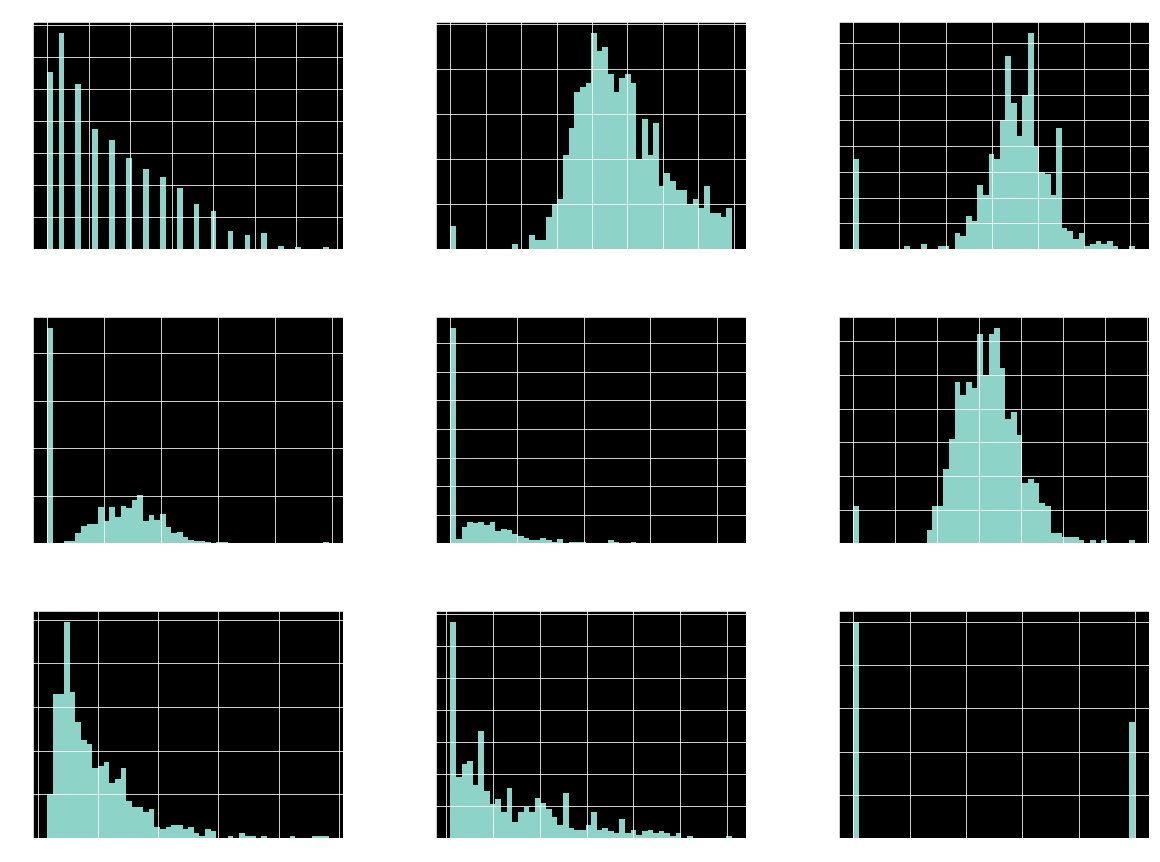

In [8]:
plot_data(dataset)

### 02. Correlation Matrix

In [10]:
# Correlation data 
corr = dataset.corr()

# Correlation matrix with seaborn (correlation val are -1 to 1, thats why vmin vmax)
ssb.heatmap(corr, vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

No meaningful correlation found. All features are informative.

### 03. Running and Parameters

##### Check Parameters

In [11]:
# Check AOC ARC curve
from sklearn.metrics import roc_auc_score, roc_curve

def aoc_arc_curve(pred, labels_test):
    """Plots the AOC ARC curve and score"""
    auc = roc_auc_score(labels_test, pred)

    false_positive_rate, true_positive_rate, thresolds = roc_curve(labels_test, pred)

    plt.figure(figsize=(5, 4), dpi=100)
    plt.axis('scaled')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.title("AUC & ROC Curve")
    plt.plot(false_positive_rate, true_positive_rate, 'y')
    
    plt.plot([0,1],[0,1], linestyle='dotted')

    plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightyellow', alpha=0.7)
    plt.text(0.95, 0.05, 'AUC = {:.2f}'.format(auc), ha='right', fontsize=12, weight='bold')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()
    
    return auc

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def parameter_check(pred, labels_test):
    """Determines accuracy, precision, recall, f1 and aoc arc curve"""
    # Check accuracy
    accuracy = accuracy_score(labels_test , pred)

    # Check precision
    precision = precision_score(labels_test , pred)

    # Check recall
    recall = recall_score(labels_test , pred)

    # Check F1 score
    F1 = f1_score( labels_test , pred)

    print('Accuracy: {:.2f}'.format(accuracy))
    print('Precision: {:.2f}'.format(precision))
    print('Recall: {:.2f}'.format(recall))
    print('F1 score: {:.2f}'.format(F1))

    auc = roc_auc_score(labels_test, pred)
    #print('AUROC score: {:.2f}'.format(auc))

    # Don't show the plot
    auc = aoc_arc_curve(pred, labels_test)
    
    return { 'accuracy': accuracy, 'precision':precision, 'recall':recall, 'fi':F1, 'auc': auc}


##### Run SVM Algorithm

In [13]:
def plotSVC(title):
    """Plot SVC graph"""    
    # Create a mesh to plot in
    x_min, x_max = X.iloc[:, 0].min()-1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min()-1, X.iloc[:, 1].max() + 1
    h = abs((x_max / x_min)/100)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Create a subplot
    plt.subplot(1, 1, 1)
    
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8) 
    
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('BMI')
    plt.ylabel('Glucose')
    plt.xlim(xx.min(), xx.max())
    plt.title(title)    
    plt.show()
    

In [14]:
def plotSVC2(title):
    """Plot SVC graph"""    
    # Create a mesh to plot in
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max() + 1
    h = abs((x_max / x_min)/100)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Create a subplot
    plt.subplot(1, 1, 1)
    
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8) 
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('BMI')
    plt.ylabel('Glucose')
    plt.xlim(xx.min(), xx.max())
    plt.title(title)    
    plt.show()


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

'''Run SVC algorithm in pandas dataframe'''

# Create features and labels (choose two parameters)
features = dataset[['BMI','Glucose']]
labels = dataset['Outcome']

# Create training (75%) and test (25%) sets 
features_train, features_test , labels_train , labels_test = train_test_split(features, labels, test_size =0.25)

X = features_train
y = labels_train

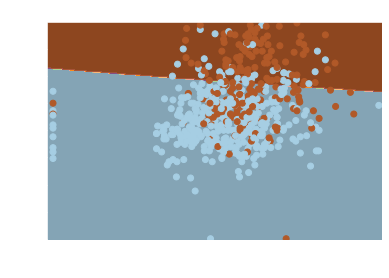

Accuracy: 0.80
Precision: 0.76
Recall: 0.55
F1 score: 0.64


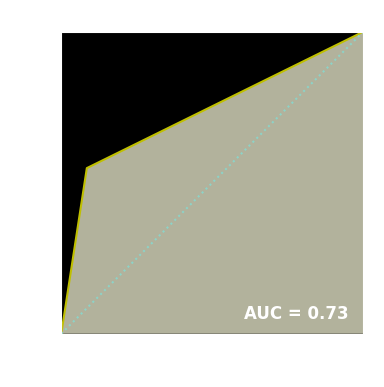

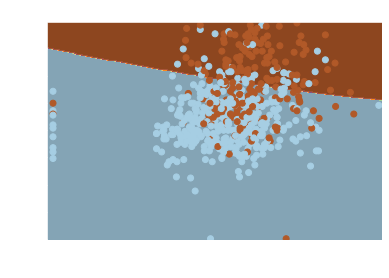

Accuracy: 0.81
Precision: 0.78
Recall: 0.56
F1 score: 0.65


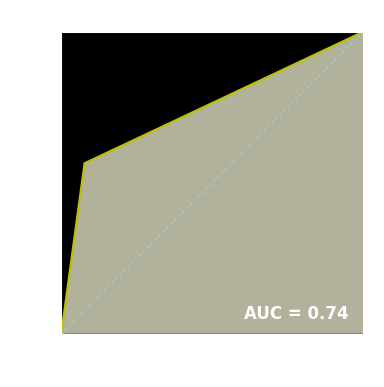

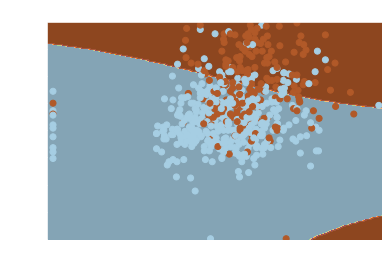

Accuracy: 0.81
Precision: 0.78
Recall: 0.58
F1 score: 0.67


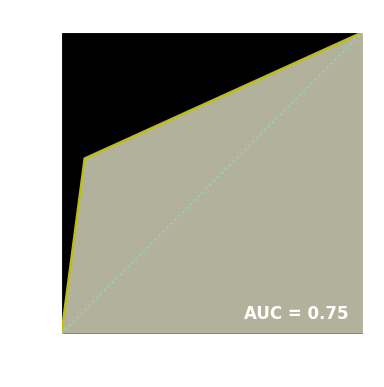

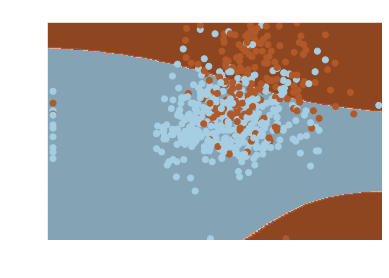

Accuracy: 0.81
Precision: 0.78
Recall: 0.56
F1 score: 0.65


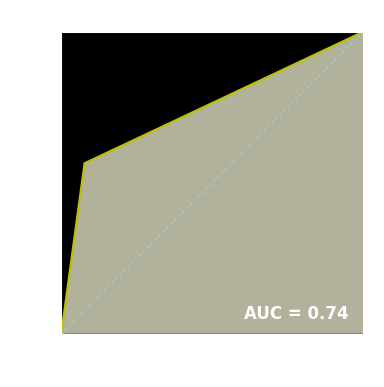

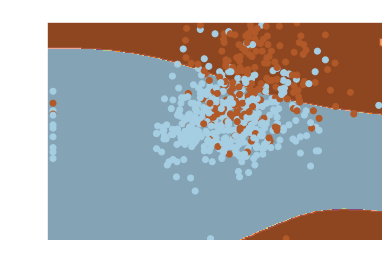

Accuracy: 0.81
Precision: 0.78
Recall: 0.56
F1 score: 0.65


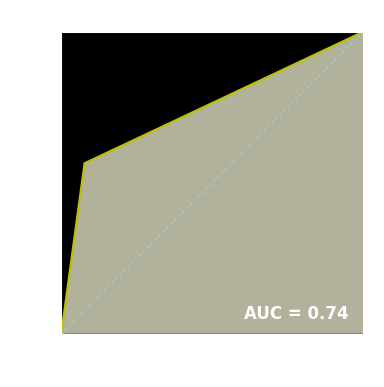

In [16]:
# Fit data for training into classifier
cs = [0.1, 1, 10, 100, 1000]
for c in cs:
    classifier= SVC(C=c, kernel='rbf')
    svm_mod= classifier.fit(X,y)
    plotSVC('C=' + str(c))
    pred = classifier.predict(features_test)
    parameter_check(pred, labels_test)

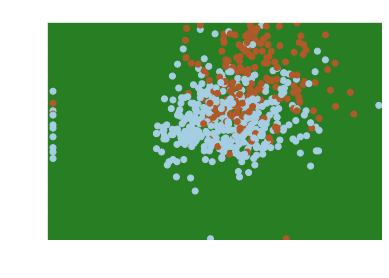

Accuracy: 0.68
Precision: 0.00
Recall: 0.00
F1 score: 0.00


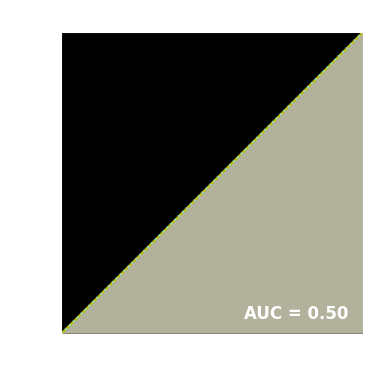

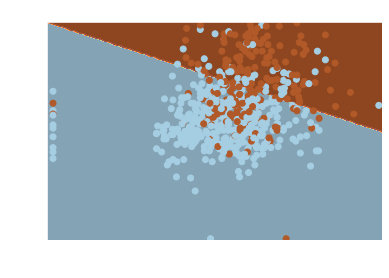

Accuracy: 0.82
Precision: 0.79
Recall: 0.60
F1 score: 0.68


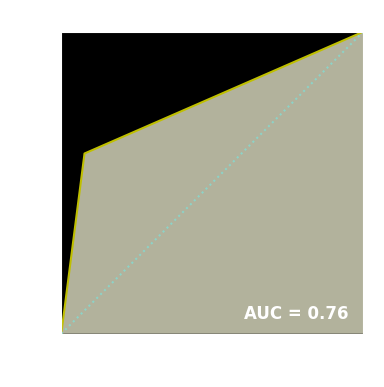

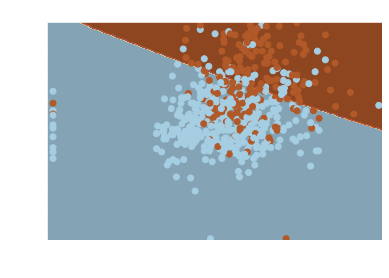

Accuracy: 0.80
Precision: 0.77
Recall: 0.55
F1 score: 0.64


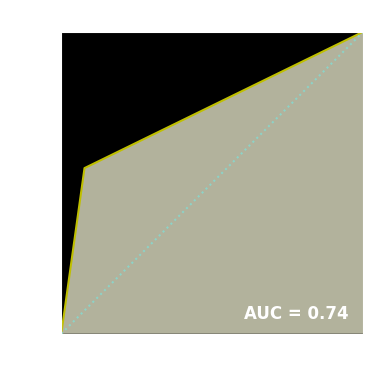

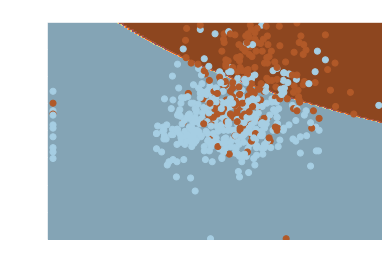

Accuracy: 0.79
Precision: 0.76
Recall: 0.52
F1 score: 0.62


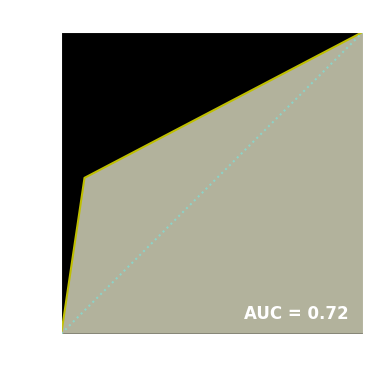

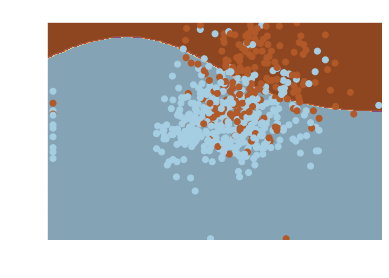

Accuracy: 0.79
Precision: 0.76
Recall: 0.50
F1 score: 0.60


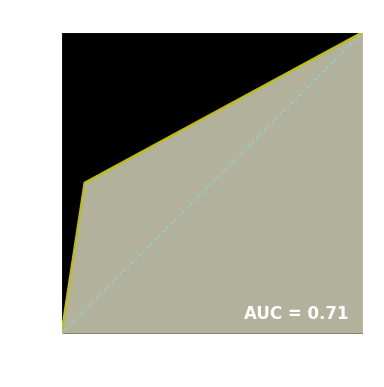

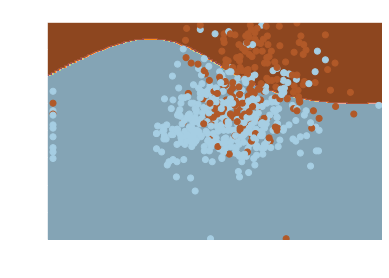

Accuracy: 0.79
Precision: 0.79
Recall: 0.48
F1 score: 0.60


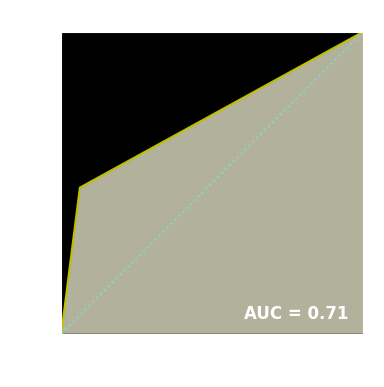

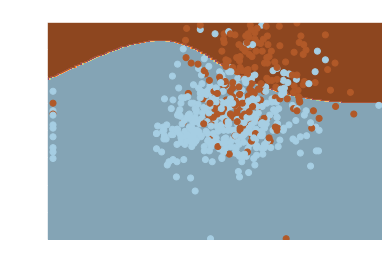

Accuracy: 0.79
Precision: 0.79
Recall: 0.48
F1 score: 0.60


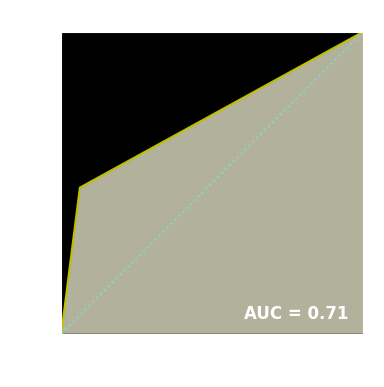

In [17]:
# Fit data for training into classifier
degrees = [0, 1, 2, 3, 4, 5, 6]
for degree in degrees:
    classifier= SVC(degree=degree, C=10, kernel='poly')
    svm_mod= classifier.fit(X,y)
    plotSVC('degree=' + str(degree))
    pred = classifier.predict(features_test)
    parameter_check(pred, labels_test)

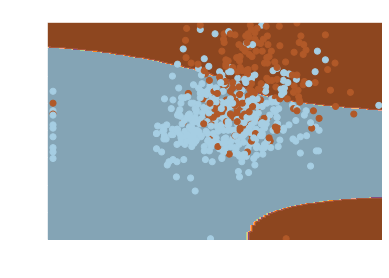

Accuracy: 0.82
Precision: 0.79
Recall: 0.60
F1 score: 0.68


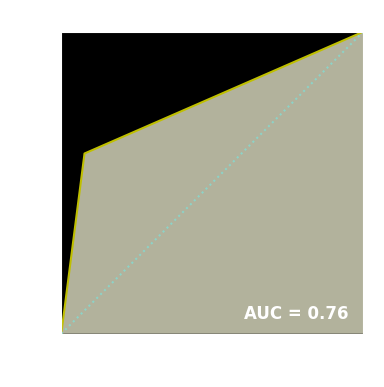

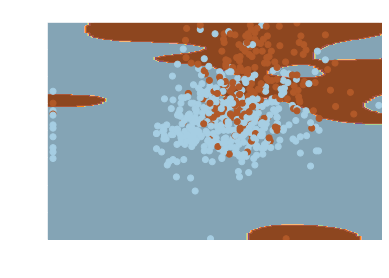

Accuracy: 0.77
Precision: 0.70
Recall: 0.52
F1 score: 0.59


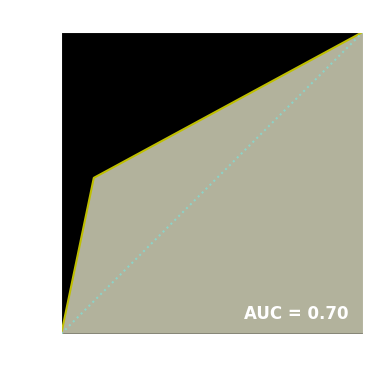

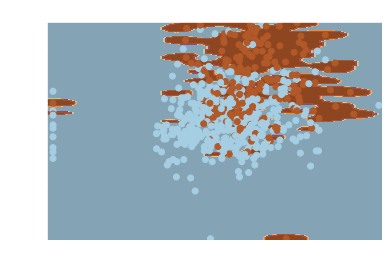

Accuracy: 0.72
Precision: 0.57
Recall: 0.56
F1 score: 0.57


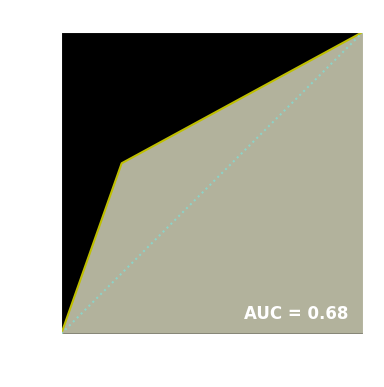

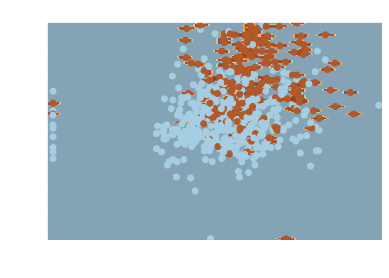

Accuracy: 0.69
Precision: 0.54
Recall: 0.31
F1 score: 0.39


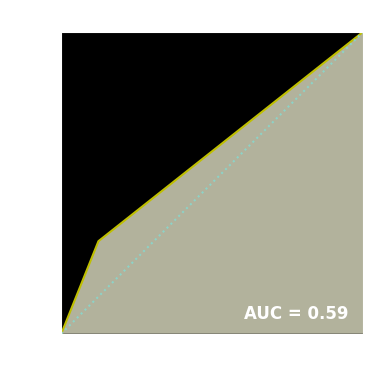

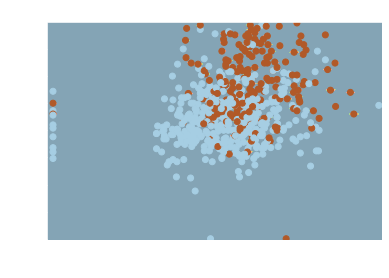

Accuracy: 0.67
Precision: 0.45
Recall: 0.08
F1 score: 0.14


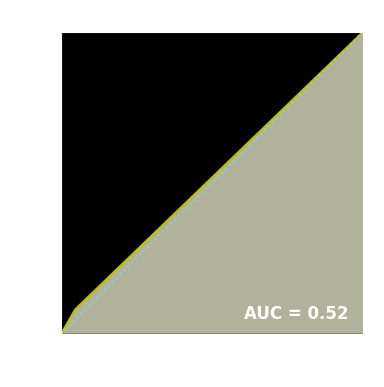

In [18]:
# Fit data for training into classifier

gammas = [0.001, 0.01, 0.1, 1, 10]
for gamma in gammas:
    classifier= SVC(gamma=gamma, degree=5, C=10, kernel='rbf')
    svm_mod= classifier.fit(X,y)
    plotSVC('gamma=' + str(gamma))
    pred = classifier.predict(features_test)
    parameter_check(pred, labels_test)

### 04. Pipeline

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Setting up a pipeline
pipe = Pipeline([
    ('scaler', None),
    ('imputer', SimpleImputer(missing_values=0)),
    ('upsampler', None),
    ('downsampler', None),
    ('svc', SVC())
])


In [22]:
from imblearn.over_sampling import RandomOverSampler, SMOTENC
from imblearn.under_sampling import RandomUnderSampler,TomekLinks
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import GridSearchCV


# Parameter grid to search over using grid search
params={
    'imputer__strategy': ['mean', 'median'],
    'upsampler': ['passthrough', 
                  RandomOverSampler(random_state=42), 
                  SMOTENC(categorical_features=[0], random_state=42, k_neighbors=0)
                 ],
    'downsampler':['passthrough', 
                   RandomUnderSampler(random_state=42),
                   TomekLinks()
                  ],
    'scaler':[StandardScaler(), MinMaxScaler()],
    'svc__degree':[0.001, 0.01, 0.1, 1, 10, 100],
    'svc__gamma' : [1,2,3,4,5],
    'svc__kernel' :['rbf', 'linear', 'poly' ,'sigmoid']
}
# Cross validation
skf = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)

# Set up the grid search
gs = GridSearchCV(pipe,params,n_jobs=-1,cv=skf)

# Fit gs to training data
gs_results = gs.fit(features_train, labels_train)

# Find best fit
print(f'Best score: {gs_results.best_score_}')
print(f'Best parameters: \n{gs_results.best_params_}')

KeyboardInterrupt: 

In [ ]:
# Get score
print(f'\nScore: {gs.score(features_test, labels_test)}')

# Predict results
labels_preds = gs.predict(features_test)
par = parameter_check(labels_preds, labels_test)